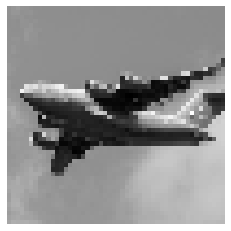

In [7]:
#이미지 크기 변경 - resize()
#머신러닝에선 주로 32x32, 64x64, 96x96, 256x256

import cv2
import numpy as np
from matplotlib import pyplot as plt

img_g = cv2.imread('images/plane_256.jpg', cv2.IMREAD_GRAYSCALE)
img_50 = cv2.resize(img_g, (50, 50))

plt.imshow(img_50, cmap='gray'), plt.axis('off')
plt.show()

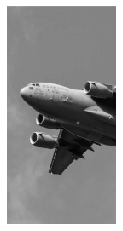

In [8]:
#이미지 자르기
img_crpd = img_g[:,:128]

plt.imshow(img_crpd, cmap='gray'), plt.axis('off')
plt.show()

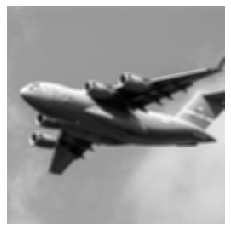

In [11]:
#이미지 투명도 처리: 각 픽셀을 주변의 평균값으로 변환
#주변 픽셀에 수행되는 연산을 커널이라고 함
#커널의 크기는 흐림의 정도 결정, 커널이 클수록 이미지가 더 부드러워짐
#커널은 이미지를 선명하게 만들 때, 경계선 감지할 때 쓰임
#blur(img, size_of_kernel)
img_blur = cv2.blur(img_g, (5,5))
#픽셀 주변의 5x5 커널 평균값으로 블러 처리

plt.imshow(img_blur, cmap='gray'), plt.axis('off')
plt.show()

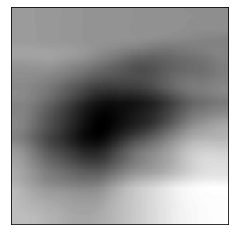

In [17]:
#100x100 커널 - 커널 크기의 영향
img_blur_more = cv2.blur(img_g, (100,100))
plt.imshow(img_blur_more, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
#투명도 처리 - filter2D(img, -1, kernel)
#위의 blur()에서 사용한 커널의 형태 - cv2.blur(img_g, (5,5)) 의 경우 5 x 5 행렬에 1 / 5^2 값이 들어간 형태
kernel = np.ones((5,5)) / 25.0
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

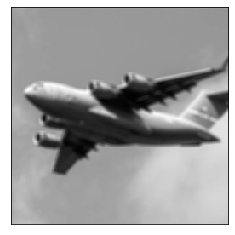

In [24]:
img_kernel = cv2.filter2D(img_g, -1, kernel) #커널을 적용
plt.imshow(img_kernel, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

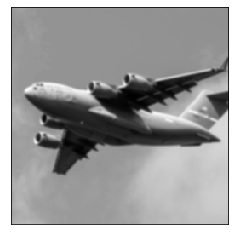

In [20]:
#가우시안 블러 - 세번째 매개변수는 X축(너비) 방향의 표준편차
#이 값이 0인 경우 ((너비-1)*0.5-1)*0.3+0.8와 같이 계산
#Y축 방향의 표준편차는 기본값이 0
#가우시안 블러의 커널은 각 축 방향으로 가우시안 분포를 따르는 1차원 배열을 만든 뒤 외적하여 생성
img_very_blurry = cv2.GaussianBlur(img_g, (5,5), 0)
plt.imshow(img_very_blurry, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

gaus_vector:
 [[0.00213616]
 [0.00476345]
 [0.00971651]]
gaus_kernel:
 [[4.56320053e-06 1.01755175e-05 2.07560597e-05 3.87288645e-05
  6.61037452e-05 1.03209297e-04 1.47405273e-04 1.92578886e-04
  2.30147240e-04 2.54414372e-04 2.54414372e-04 2.30147240e-04
  1.92578886e-04 1.47405273e-04 1.03209297e-04 6.61037452e-05
  3.87288645e-05 2.07560597e-05 1.01755175e-05 4.56320053e-06]
 [1.01755175e-05 2.26904684e-05 4.62841044e-05 8.63618063e-05
  1.47405273e-04 2.30147240e-04 3.28700204e-04 4.29433207e-04
  5.13207182e-04 5.67320653e-04 5.67320653e-04 5.13207182e-04
  4.29433207e-04 3.28700204e-04 2.30147240e-04 1.47405273e-04
  8.63618063e-05 4.62841044e-05 2.26904684e-05 1.01755175e-05]
 [2.07560597e-05 4.62841044e-05 9.44104934e-05 1.76161143e-04
  3.00677841e-04 4.69455223e-04 6.70483935e-04 8.75959501e-04
  1.04684198e-03 1.15722284e-03 1.15722284e-03 1.04684198e-03
  8.75959501e-04 6.70483935e-04 4.69455223e-04 3.00677841e-04
  1.76161143e-04 9.44104934e-05 4.62841044e-05 2.07560597e-

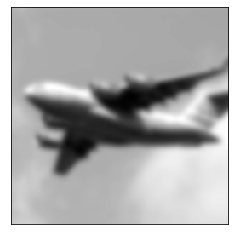

In [38]:
#getGaussianKernel()을 사용해 1차원 배열을 만들고 numpy의 outer함수로 외적 계산할 수 있음
#filter2D()의 두번째 매개변수는 픽셀값의 범위 지정 - -1이면 입력값과 동일한 범위 유지

gaus_vector = cv2.getGaussianKernel(20,0)
print('gaus_vector:\n', gaus_vector[:3])
gaus_kernel = np.outer(gaus_vector,gaus_vector) #벡터를 외적하여 커널 만듦
print('gaus_kernel:\n', gaus_kernel[:3])

#filter2D()로 커널을 이미지에 직접 적용하여 비슷한 흐림 효과 만들 수 있음
img_kernel = cv2.filter2D(img_g, -1, gaus_kernel)
plt.imshow(img_kernel, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

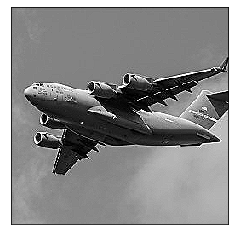

In [44]:
#이미지 선명하게

kernel = np.array([[0, -1, 0],
                  [-1,5,-1],
                  [0,-1,0]]) #대상 픽셀을 강조하는 커널 생성
#이미지의 경계선에서 대비가 더 두드러짐
img_sharp = cv2.filter2D(img_g, -1, kernel)

plt.imshow(img_sharp, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

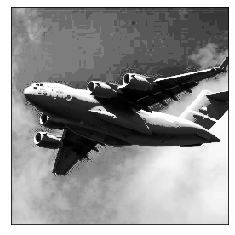

In [46]:
#이미지 대비 높이기
#흑백 이미지는 equalizeHist() 바로 적용 가능
#히스토그램 평활화를 통해 픽셀값의 범위가 커지도록 이미지 변환

img_ehcd = cv2.equalizeHist(img_g) #이미지 대비 향상

plt.imshow(img_ehcd, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

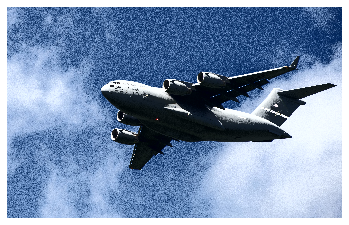

In [98]:
#Y는 루마(luma) 또는 밝기, U와 V는 컬러를 나타냄
img_bgr = cv2.imread('images/plane.jpg') #칼라 이미지 호출
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV) #YUV로 변경
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB) #RGB로 변경

plt.imshow(img_rgb, cmap='gray'), plt.axis('off')
plt.show()

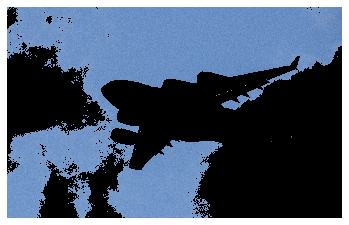

In [50]:
#색상 구분

img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV) #hsv파일로 변환
lower_blue = np.array([50,100,150])
upper_blue = np.array([130,255,255])
mask = cv2.inRange(img_hsv, lower_blue, upper_blue) #mask 만들어줌
img_bgr_masked = cv2.bitwise_and(img_bgr, img_bgr, mask=mask) #이미지에 마스크 적용
img_rgb = cv2.cvtColor(img_bgr_masked, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb), plt.axis('off')
plt.show()
#파란색만 나타내는 코드

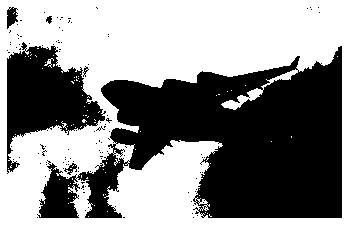

In [53]:
#마스크의 모습
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

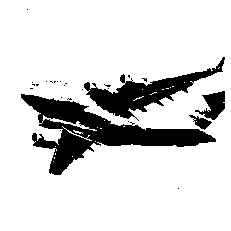

In [83]:
#이미지 이진화
#적응적 이진화: 주변 픽셀의 강도에 따라 픽셀의 임계값이 결정됨
#영역마다 빛 조건이 달라질 때 도움이 됨
#adaptiveThreshold(), 매개변수 max_output_value(출력 픽셀 강도의 최대값 설정)
#cv.ADAPTIVE_THRESH_GAUSSIAN_C: 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정
#cv.ADAPTIVE_THRESH_MEAN_C: 주변 픽셀의 평균으로 설정 (미세 조정?)

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
img_bin = cv2.adaptiveThreshold(img_g, max_output_value,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, neighborhood_size,
                               subtract_from_mean) #적응적 임계처리 적용
plt.imshow(img_bin, cmap='gray'), plt.axis('off')
plt.show()

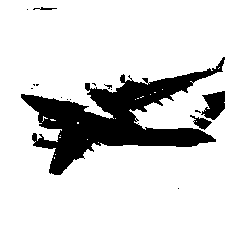

In [84]:
img_mean_bin = cv2.adaptiveThreshold(img_g, max_output_value,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, neighborhood_size,
                                     subtract_from_mean) #적응적 임계처리 적용

plt.imshow(img_mean_bin, cmap='gray'), plt.axis('off')
plt.show()
#위의 가우시안이 좀 더 세밀하게 표현

In [107]:
#배경 제거

img_bgr = cv2.imread('images/plane_256.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rect = (0,56,256,150) #사각형 좌표: 시작점의 x ,y, 너비, 높이

mask = np.zeros(img_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64) #grabCut에 사용할 임시 배열
fgdModel = np.zeros((1,65), np.float64)

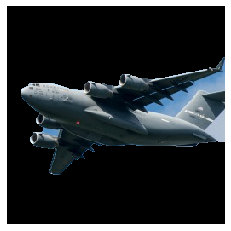

In [108]:
cv2.grabCut(img_rgb, mask,
            rect,
            bgdModel, #임시 배경 배열
            fgdModel, #임시 전경 배열
            5,
            cv2.GC_INIT_WITH_RECT) #사각형 사용하여 초기화

#배경인 곳은 0, 이외에는 1로 설정한 마스크 만들기
mask_2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

#이미지에 새로운 마스크를 곱해 배경 제외시킴
img_rgb_nobg = img_rgb * mask_2[:, :, np.newaxis]

plt.imshow(img_rgb_nobg), plt.axis('off')
plt.show()

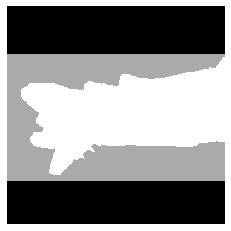

In [109]:
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

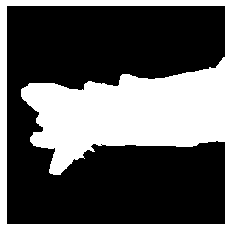

In [110]:
plt.imshow(mask_2, cmap='gray'), plt.axis('off')
plt.show()

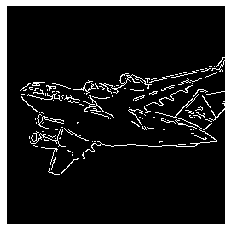

In [113]:
#경계선 감지: Canny 경계선 감지 함수 - 낮은 임곗값과 높은 임곗값이 필수 매개변수

img_g = cv2.imread('images/plane_256.jpg', cv2.IMREAD_GRAYSCALE)
median_intensity = np.median(img_g) #픽셀 강도의 중간값 계산

#중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값(1 마할라노비스 거리)을 임계값으로 지정
lower_threshold = int(max(0,(1.0-0.33) * median_intensity))
upper_threshold = int(min(255,(1.0+0.33) * median_intensity))
#표준 편차가 0.33?

img_canny = cv2.Canny(img_g, lower_threshold, upper_threshold)

plt.imshow(img_canny, cmap='gray'), plt.axis('off')
plt.show()

In [124]:
#모서리 감지: cornerHarris()
#매개변수 block_size - 모서리 감지에 사용되는 이웃 픽셀 크기
#매개변수 aperture - 사용하는 소벨 커널 크기

img_bgr = cv2.imread('images/plane_256.jpg')
img_g = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_g = np.float32(img_g)
block_size = 2 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 0.04

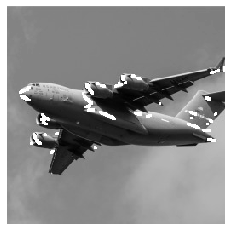

In [157]:
detector_responses = cv2.cornerHarris(img_g,
                                      block_size,
                                      aperture,
                                      free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킵니다.

# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02 #임계값 설정
img_bgr[detector_responses
        > threshold * detector_responses.max()] = [255,255,255]

img_g = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # 흑백으로 변환

plt.imshow(img_g, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

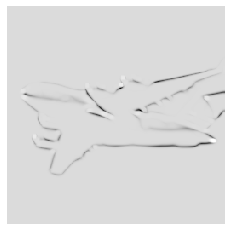

In [158]:
# 가능성이 높은 모서리를 출력합니다.
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

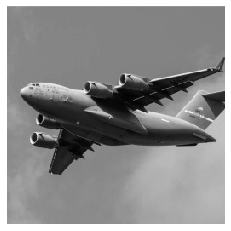

[[[ 31. 160.]]

 [[100.  91.]]

 [[164. 124.]]

 [[245. 158.]]

 [[144.  81.]]

 [[ 33.  92.]]

 [[229. 105.]]

 [[ 43. 129.]]

 [[120. 131.]]

 [[ 55. 167.]]]


In [159]:
#goodFeaturesToTrack()
img_bgr = cv2.imread('images/plane_256.jpg')
img_g = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(img_g,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance) # 모서리를 감지
corners = np.float32(corners)

for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)
    # 모서리마다 흰 원을 그립니다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # 흑백 이미지로 변환
plt.imshow(img_rgb, cmap='gray'), plt.axis("off") # 이미지를 출력
plt.show()

print(corners)

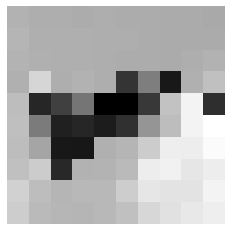

(10, 10)
(100,)


In [120]:
#머신러닝 특성 만들기 - numpy의 flatten() 사용, 다차원 배열을 벡터로 변환
#ex 100x100 사이즈의 컬러 이미지는 총 3만 개의 길이를 갖는 일차원 배열이 됨

img = cv2.imread('images/plane_256.jpg', cv2.IMREAD_GRAYSCALE)
img_10x10 = cv2.resize(img, (10,10)) #이미지를 10x10 픽셀 크기로 변환
img_10x10.flatten() #일차원 벡터로 변환

plt.imshow(img_10x10, cmap='gray'), plt.axis('off')
plt.show()

print(img_10x10.shape)
print(img_10x10.flatten().shape)

In [122]:
#머신러닝 특성 만들기 예시- 컬러 이미지

img_color = cv2.imread('images/plane_256.jpg', cv2.IMREAD_COLOR)
img_color_10x10 = cv2.resize(img_color, (10,10))
img_color_10x10.flatten()

img_color_256 = cv2.imread('images/plane_256.jpg', cv2.IMREAD_COLOR)
img_color_256.flatten()
img_color_256.shape
img_color_256.flatten().shape

(196608,)

In [193]:
#평균 색을 특성으로 인코딩

img_bgr = cv2.imread('images/plane_256.jpg', cv2.IMREAD_COLOR)
channels = cv2.mean(img_bgr) #각 채널의 평균 계산

#bgr로 계산했으므로 rgb로 순서 바꿔 넣어줌
observation = np.array([(channels[2], channels[1], channels[0])])
observation

array([[ 90.52377319, 133.11940002, 169.02355957]])

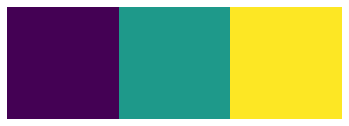

In [194]:
plt.imshow(observation), plt.axis('off')
plt.show()

In [195]:
#컬러 히스토그램을 특성으로 인코딩

img_bgr = cv2.imread('images/plane_256.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
features = []
colors = ('r','g','b') #각 컬러 채널에 대해 히스토그램 계산

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img_rgb],
                            [i],         #채널 인덱스
                            None,       #마스크 없음
                            [256],       #히스토그램 크기
                            [0,256])     #범위
    features.extend(histogram)

print(histogram)

observation = np.array(features).flatten()
observation.shape

[[0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.000e+00]
 [0.000e+00]
 [3.000e+00]
 [8.000e+00]
 [8.000e+00]
 [1.300e+01]
 [2.600e+01]
 [3.100e+01]
 [4.500e+01]
 [7.600e+01]
 [1.090e+02]
 [1.400e+02]
 [1.360e+02]
 [1.560e+02]
 [1.740e+02]
 [1.510e+02]
 [1.530e+02]
 [1.640e+02]
 [1.610e+02]
 [1.720e+02]
 [1.810e+02]
 [1.670e+02]
 [2.370e+02]
 [2.590e+02]
 [2.610e+02]
 [3.040e+02]
 [3.220e+02]
 [3.070e+02]
 [3.620e+02]
 [3.860e+02]
 [3.510e+02]
 [3.640e+02]
 [3.300e+02]
 [2.940e+02]
 [3.320e+02]
 [2.900e+02]
 [3.060e+02]
 [2.580e+02]
 [2.360e+02]
 [1.830e+02]
 [1.850e+02]
 [1.830e+02]
 [1.770e+02]
 [1.620e+02]
 [1.340e+02]
 [1.440e+02]
 [1.420e+02]
 [1.270e+02]
 [1.110e+02]
 [1.200e+02]
 [1.090e+02]
 [1.130e+02]
 [9.600e+01]
 [9.500e+01]
 [8.000e+01]
 [1.070e+02]
 [8.500e+01]
 [1.050e+02]
 [8.800e+01]
 [9.900e+01]
 [1.110e+02]
 [7.800e+01]
 [8.400e+01]
 [8.300e+01]
 [7.400e+01]
 [6.100e+01]
 [6.400e+01]
 [7.600e+01]
 [7.300e+01]

(768,)

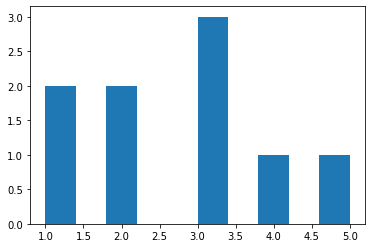

In [197]:
import pandas as pd

data = pd.Series([1,1,2,2,3,3,3,4,5]) #예시 데이터
data.hist(grid=False)
plt.show()

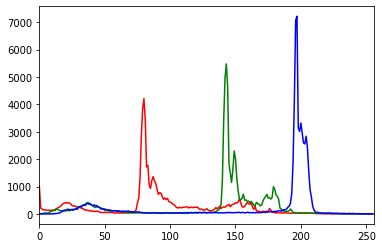

In [198]:
colors = ('r','g','b')

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img_rgb],
                            [i],         #채널 인덱스
                            None,       #마스크 없음
                            [256],       #히스토그램 크기
                            [0,256])     #범위
    plt.plot(histogram, color=channel)
    plt.xlim([0,256])
    
plt.show()

In [271]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits() # 8x8 크기의 손글씨 숫자 데이터 로드
features = StandardScaler().fit_transform(digits.data) #특성 행렬을 표준화 처리

#99%의 분산을 유지하도록 PCA 클래스 객체 호출
pca = PCA(n_components=0.57, whiten=True)
#n_components: 0~1 일 땐 해당 값의 비율의 분산을 유지할 수 있는 최소한의 특성 개수 반환
#whiten: True로 두면 평균 0 분산 1로 표준화

features_pca = pca.fit_transform(features) #PCA 수행

print("원본 특성 개수:", features.shape[1]) # 결과를 확인
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


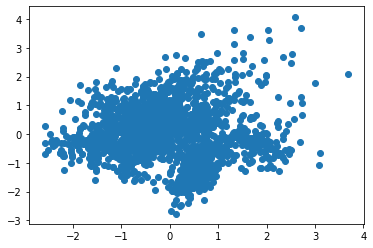

In [215]:
plt.scatter(features_pca[:,0], features_pca[:,1])
plt.show()

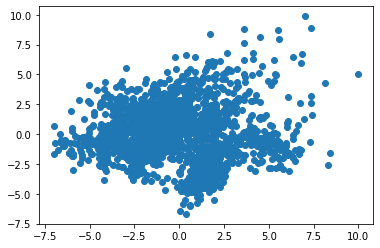

(54, 64)

In [219]:
pca_nowhiten = PCA(n_components=0.99)
#표준화 X - 평균은 0이지만 스케일은 맞춰지지 않음
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:,0], features_nowhiten[:,1])
plt.show()

pca_nowhiten.components_.shape
#PCA로 주성분은 components_ 속성에 저장
#각 주성분은 원본 특성 공간에서 어떤 방향을 나타내므로 벡터 크기는 64

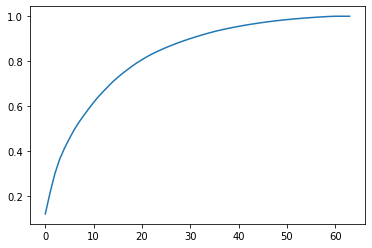

In [221]:
np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#numpy cumsum()으로 분산의 누적 그래프 출력
#대략 30개의 주성분으로도 80% 이상의 분산 유지 가능

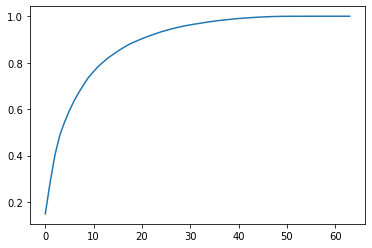

In [222]:
#표준화하지 않은 원본 데이터의 경우
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#더 많은 주성분이 필요

In [225]:
#선형적으로 구분되지 않는 데이터의 차원 축소: 커널 트릭 사용하여 주성분 분석의 확장을 통해 비선형 차원 축소를 수행
#표준 PCA는 선형적인 투영을 통한 특성 축소
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

#make_circles로 선형적으로 구분되지 않는 데이터를 만듦
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

#방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA를 적용
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

#실제 고차원 공간으로 변환하는 것은 아니므로 PCA처럼 주성분을 얻을 순 없음

#kernel 매개변수의 기본값은 linear입니다.
#gamma 매개변수는 rbf, poly, sigmoid 커널에서 사용하는 계수이고 기본값은 특성 개수의 역수입니다.
#degree 매개변수는 poly 커널에 사용하는 거듭제곱 수이고 기본값은 3입니다.
#coef0 매개변수는 poly와 sigmoid 커널에 사용되는 상수항으로 기본값은 1입니다. 

원본 특성 개수: 2
줄어든 특성 개수: 1


(1000, 1)

In [235]:
#클래스 분리를 최대화함으로써 특성 줄이기
#선형 판별 분석(LDA)를 통해 최대한 분리하는 성분 축으로 특성을 투영
#LDA는 분류 알고리즘이지만 차원 축소에도 자주 사용됨
#LDA는 특성 공간을 저차원 공간으로 투영
#PCA가 데이터에서 분산이 최대인 성분 축에만 관심이 있는 반면
#LDA는 클래스 간의 차이를 최대화하는 추가적인 목적을 가짐

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = datasets.load_iris()
features = iris.data
target = iris.target

lda = LDA(n_components = 1)
features_lda = lda.fit(features, target).transform(features)

print('원본 특성 개수:', features.shape[1])
print('줄어든 특성 개수:', features_lda.shape[1])

#explained_variance_ratio 를 사용해 각 성분이 설명하는 분산의 양을 확인
lda.explained_variance_ratio_

원본 특성 개수: 4
줄어든 특성 개수: 1


array([0.9912126])

In [248]:
#n_components 매개변수는 원하는 특성의 개수 의미
#이 값을 정하기 위해선 explained_variance_ratio_를 참고하면 됨
#None으로 지정시 모든 성분 특성에 의해 설명된 분산의 비율을 반환
#LDA는 PCA와 달리 target 벡터를 사용

lda = LDA(n_components=None) #None으로 지정한 lda 객체 생성
features_lda = lda.fit(features, target)
#설명된 분산의 비율이 담긴 배열을 저장
lda_var_ratios = lda.explained_variance_ratio_
lda_var_ratios

array([0.9912126, 0.0087874])

In [262]:
def select_n_components(var_ratio, goal_var:float) -> int:
    total_variance = 0.0
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
        
    return n_components
#성분별 누적 분산이 목표에 도달하면 그 때 n_components 값을 반환해줌
print(select_n_components(lda_var_ratios, 0.95))

1


In [263]:
#음수가 아닌 특성 행렬이 있을 때 차원 축소하려면
#비음수 행렬 분해(non_negative matrix factorization, NMF)를 사용

from sklearn.decomposition import NMF
from sklearn import datasets

digits = datasets.load_digits()
features = digits.data

nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [287]:
#원하는 특성 개수 r이 주어지면 NMF는 V ~= WH 형태로 특성 행렬을 분해
#V - n x d 크기 (n개의 샘플, d개의 특성)
#W - n x r 크기 / H - r x d 크기
#특성 행렬이 음수 포함할 수 없음
#H 행렬은 components_ 속성에 저장됨
#W와 H를 곱하면 원본 데이터 복원 가능
#NMF 클래스의 solver 매개변수의 기본값은 cd로 좌표 하강법을 사용

features = abs(digits.data)
print('nmf.components_.shape:',nmf.components_.shape)
print('np.all(nmf.components_ >= 0)?',np.all(nmf.components_ >= 0))
np.mean(features - np.dot(features_nmf, nmf.components_))

#곱셈 업데이트 알고리즘인 mu 옵션
nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
features_nmf_mu = nmf_mu.fit_transform(features)
np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

nmf.components_.shape: (10, 64)
np.all(nmf.components_ >= 0)? True


-0.12629945585681077

In [289]:
#희소한 데이터의 특성 줄이기 - TSVD (PCA와 비슷)
'''
PCA의 단계 중 하나에서 종종 기본 SVD 방식을 사용합니다.  기본 SVD에서 d개의 특성이 주어지면 SVD는 d x d 크기의 분해 행렬을 만듭니다.  TSVD는 사전에 매개변수에서 지정한 n으로 값n x n 크기의 행렬을 만듭니다.  TSVD는 PCA와 달리 희소 특성 행렬에 사용할 수 있습니다.  TSVD는 난수 생성기를 사용하기 때문에 출력 부호가 훈련하는 사이에 뒤집힐 수 있기 때문에 전처리 파이프라인
마다 한 번만 fit() 호출하고 그 다음 여러 번 transform()를 사용합니다. 선형 판별 분석처럼 n_components를 사용
하여 필요한 특성(성분)의 개수를 지정해야 합니다.  n_components를 하이퍼파라미터로 모델 선택 과정에서 최적화하는 것입니다.  TSVD가 성분마다 원본 특성 행렬의 설명된 분산 비율을 제공하기 때문에 필요한 분산의 양을 설명할 수 있는 성분
개수를 선택할 수 있습니다.
'''
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data) #특성 행렬 표준화

features_sparse = csr_matrix(features) #희소 행렬 생성
tsvd = TruncatedSVD(n_components=10)

#희소 행렬에 TSVD 적용
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

print("원본 특성 개수:", features_sparse.shape[1]) # 결과 출력
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

#처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:3].sum()

원본 특성 개수: 64
줄어든 특성 개수: 10


0.3003938539146275

In [295]:
#원본 특성 개수보다 하나 작게 n_components를 지정하고
#TSVD를 실행하여 원하는 원본 데이터의 분산에서 설명된
#양에 맞는 성분 개수를 계산하는 함수를 만들어 자동화 가능

tsvd = TruncatedSVD(n_components=features_sparse.shape[1] - 1)
#n_components 값이 원본 개수는 안 되므로 넣을 수 있는 최고값인 원본 개수 - 1 넣어주는 듯
#그 다음에 밑에 함수로 최적 n_comp 값 구하는 듯
features_tsvd = tsvd.fit(features)

tsvd_var_ratios = tsvd.explained_variance_ratio_ #설명된 분산을 리스트에 저장

def select_n_components(var_ratio, goal_var):
    total_variance = 0.0
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        
        #설명된 분산 목표에 도달하면 반복 끝
        if total_variance >= goal_var:
            break
    
    return n_components #성분 개수 반환

select_n_components(tsvd_var_ratios, 0.95)

40

In [299]:
#PCA는 최대 분산의 방향을 찾기 위해 원점에서 맞춘 특성 행렬의 공분산 행렬에서 고유 벡터를 찾음
#이는 특성 행렬을 특이값 분해(SVD)하여 얻은 특이 벡터와 같다
#따라서 특성 행렬을 원점에 맞추고 TSVD를 적용하면 PCA와 거의 같은 결과가 나옴

#PCA 클래스의 svd_solver 매개변수가 기본값 auto면
#샘플 개수 500개 이하일 땐 SVD 분해를 사용하는 full이 됨?
#500개보다 크면 랜덤 SVD를 사용하는 randomized?

#TSVD의 algorithm 매개변수 기본값은 랜덤SVD를 의미하는 randomized

features = digits.data - np.mean(digits.data, axis=0)
pca = PCA(n_components=40, random_state=1)

features_pca = pca.fit_transform(features)
svd = TruncatedSVD(n_components=40, random_state=1)

features_tsvd = tsvd.fit_transform(features)
np.max(np.abs(features_pca.shape[1] - features_tsvd.shape[1]))

'''
이 페이지 이해 안 감
'''

23

In [311]:
#특성 선택을 사용한 차원 축소
#분산을 기준으로 수치 특성 선택 - variance thresholding VT
#분산은 원점에 맞춰진 값이 아닌 특성의 제곱 단위이므로
#특성의 단위가 서로 다르면 동작하지 않음

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

iris = datasets.load_iris()
features = iris.data
target = iris.target

thresholder = VarianceThreshold(threshold=.05) #기준값 생성
features_high_variance = thresholder.fit_transform(features)
#기준값보다 높은 특성 선택

print(features_high_variance[0:5])
thresholder.variances_

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [306]:
#표준화된 특성엔 VT가 올바르게 동작하지 않음
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 특성 행렬을 표준화합니다.
features_std = scaler.fit_transform(features)

selector = VarianceThreshold() # 각 특성의 분산을 계산합니다.
selector.fit(features_std).variances_

array([1., 1., 1., 1.])

In [312]:
#분산을 기준으로 이진 특성 선택
#이진 범주형 특성에서 베르누이 확률 변수의 분산이 기준값 이상인 특성을 선택할 수 있도록
#분산이 낮은 특성(적은 정보를 가진 특성)을 삭제
#대다수가 한 개의 클래스에 속한 특성 삭제
from sklearn.feature_selection import VarianceThreshold

features = [[0, 1, 0],
            [0, 1, 1], # 특성 0: 80%가 클래스 0
            [0, 1, 0], # 특성 1: 80%가 클래스 1
            [0, 1, 1], # 특성 2: 60%가 클래스 0, 40%는 클래스 1
            [1, 0, 0]]

# 분산을 기준으로 선택합니다.
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
thresholder.fit_transform(features)
print(thresholder.variances_)
#threshold 값보다 높은 분산을 갖는 특성들의 분산 출력

import numpy as np
np.var(features, axis=0) #넘파이 var 함수를 사용하여 분산을 계산합니다

[0.16 0.16 0.24]


array([0.16, 0.16, 0.24])

In [17]:
#상관관계가 큰 특성 삭제
import numpy as np
import pandas as pd

#상관관계가 큰 두 개의 특성을 가진 특성 행렬 생성
features = np.array([[1,1,1],[2,2,0],[3,3,1],[4,4,0],[5,5,1],[6,6,0],[7,7,1],[8,7,0],[9,7,1]])

df = pd.DataFrame(features)
corr_matrix = df.corr().abs() #상관관계 행렬 생성

#상관관계 행렬의 상삼각(upper triangle)행렬 선택
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#triu의 매개변수 k는 대각선 기준 k칸 위의 삼각 행렬을 가져온다는 뜻

#상관계수가 0.95보다 큰 특성 열의 인덱스를 찾는다
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [24]:
#상관관계가 큰 특성 삭제 - 상관관계 행렬은 numpy의 corrcoef()로도 구할 수 있음
#corrcoef()는 특성이 행에 있는 것이 default이므로 열에 있는 것으로 하려면
#매개변수 rowvar = False 로 지정

df.drop(df.columns[to_drop], axis=1) #위에서 찾은 상관관계가 0.95 이상인 열 삭제

df.corr() #상관관계 행렬
upper #상관관계 행렬의 상삼각 행렬

np.corrcoef(features, rowvar=False)

#np.triu 예시
np.triu(np.ones((4,4)), k=2)
np.triu(np.ones((4,4)), k=0)

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [403]:
#분류 작업에 관련 없는 특성 삭제 - 독립성 검정
#범주형 타깃 벡터에서 관련 없는 특성 삭제하기 위해 타깃 벡터 사이의 카이제곱 통계 계산
#카이제곱 통계는 두 범주형 벡터의 독립성 평가 -
#범주형 특성의 각 클래스별 샘플 빈도와 이 특성이 타깃 벡터와 독립적이라면 기대할 수 있는 값 사이의 차이
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

iris = load_iris() # 데이터 로드
features = iris.data
target = iris.target
features = features.astype(int) #범주형 데이터를 정수형으로 변환

#카이제곱 통계값이 가장 큰 특성 두 개를 선택
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)

print("원본 특성 개수:", features.shape[1]) # 결과 확인
print("줄어든 특성 개수:", features_kbest.shape[1]) #고른 특성 개수 k 따라감

원본 특성 개수: 4
줄어든 특성 개수: 2


In [384]:
#카이제곱 검정 특징
'''
특성 선택에서 카이제곱을 사용하려면 각 특성과 타깃 벡터 사이의 카이제곱 통계를 계산하고
카이제곱 통계가 가장 좋은 특성을 선택해야 합니다.
사이킷런에서는 SelectBest를 사용하여 통계값이 가장 좋은 특성을 선택할 수 있습니다.
매개변수 k는 선택하려는 특성의 개수를 결정합니다
카이제곱 통계는 두 범주형 벡터 사이에서만 계산할 수 있습니다.
특성 선택으로 카이제곱을 사용하려면 타깃 벡터와 특성이 범주형이어야 합니다.
수치형 특성이 있다면 수치형을 범주형 특성으로 변환하여 카이제곱 특성을 사용할 수 있습니다.
카이제곱 방식을 사용하려면 모든 값이 음수가 아니어야 합니다.
'''

'\n특성 선택에서 카이제곱을 사용하려면 각 특성과 타깃 벡터 사이의 카이제곱 통계를 계산하고\n카이제곱 통계가 가장 좋은 특성을 선택해야 합니다.\n사이킷런에서는 SelectBest를 사용하여 통계값이 가장 좋은 특성을 선택할 수 있습니다.\n매개변수 k는 선택하려는 특성의 개수를 결정합니다\n카이제곱 통계는 두 범주형 벡터 사이에서만 계산할 수 있습니다.\n특성 선택으로 카이제곱을 사용하려면 타깃 벡터와 특성이 범주형이어야 합니다.\n수치형 특성이 있다면 수치형을 범주형 특성으로 변환하여 카이제곱 특성을 사용할 수 있습니다.\n카이제곱 방식을 사용하려면 모든 값이 음수가 아니어야 합니다.\n'

In [400]:
# F-값이 가장 높은 특성 두 개를 선택합니다.
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

print("원본 특성 개수:", features.shape[1]) # 결과 확인
print("줄어든 특성 개수:", features_kbest.shape[1])

# 특정 특성 개수를 선택하는 대신 Selectpercentile를 사용하여 특성의 상위 n 퍼센트를 선택할 수 있습니다.
from sklearn.feature_selection import SelectPercentile

# 가장 큰 F-값의 상위 75% 특성을 선택합니다.
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)

print("원본 특성 개수:", features.shape[1]) # 결과 선택
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 2
원본 특성 개수: 4
줄어든 특성 개수: 3


In [398]:
print(features.shape)
#(150,4)특성 행렬의 차원을 (3, 50, 4)로 바꾸어 클래스별 합을 구합니다.
observed = np.sum(features.reshape(3, 50, 4), axis=1)
print('observed:\n',observed)

#특성 타깃과 완전 독립이라면 기대 빈도는 전체 합을 클래스 개수 3으로 나눈 값이 됩니다.
expected = features.sum(axis=0) / 3
print('expected:\n',expected)

#""카이제곱 공식에"" 위에서 구한 observed와 expected를 대입합니다.
print('np.sum((observed - expected)**2 / expected, axis=0):\n',np.sum((observed - expected)**2 / expected, axis=0))

#카이제곱 값이 큰 (비교적 독립에 가까운) 세 번째, 네 번째 특성이 선택됩니다. chi2_selector객체의 scores_속성에 저장
print('chi2_selector.scores_:\n',chi2_selector.scores_)

#reshape(3,50,4) 하는 이유????????????

(150, 4)
observed:
 [[230 152  50   0]
 [274 116 191  50]
 [304 129 255  79]]
expected:
 [269.33333333 132.33333333 165.33333333  43.        ]
np.sum((observed - expected)**2 / expected, axis=0):
 [ 10.28712871   5.02267003 133.06854839  74.27906977]
chi2_selector.scores_:
 [ 10.28712871   5.02267003 133.06854839  74.27906977]


In [389]:
#ANOVA 계산
##전체 평균과 클래스 평균을 계산
total_mean = np.mean(features, axis=0)
total_mean
class_mean = np.mean(features.reshape(3, 50, 4), axis=1)
class_mean

#ss_total 계산
ss_between = np.sum(50 * (class_mean - total_mean)**2, axis=0)
ss_between
ss_total = np.sum((features - total_mean)**2, axis=0)
ss_total

#ss_beteen과 ss_tatal을 F-값 공식에 대입
f = (ss_between/(3-1)) / ((ss_total-ss_between)/(150-3))
print(f)

fvalue_selector.scores_ #F-값 scores_속성에서 확인

[  81.19776715   33.71497585 1160.00645624  385.48275862]


array([  81.19715 ,   33.715004, 1160.0116  ,  385.483   ], dtype=float32)

In [379]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_regression(n_samples = 10000,
                                   n_features = 100,
                                   n_informative = 2,
                                   random_state = 1)

# 선형 회귀 모델을 만듭니다.
ols = linear_model.LinearRegression()

#재귀적으로 특성을 제거합니다.
#특성을 제거했을 때 CV 결과가 나빠지기 전까지 재귀적으로 교차검증을 수행됨
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
#step: 단계마다 삭제할 특성의 개수 혹은 비율 지정
rfecv.fit(features, target)
rfecv.transform(features)

array([[ 0.00850799,  0.7031277 ],
       [-1.07500204,  2.56148527],
       [ 1.37940721, -1.77039484],
       ...,
       [-0.80331656, -1.60648007],
       [ 0.39508844, -1.34564911],
       [-0.55383035,  0.82880112]])

In [380]:
print('rfecv.n_features_:\n', rfecv.n_features_) # 최선의 특성 개수
rfecv.support_ # 선택된 특성이 표시된 불리언 마스크
rfecv.ranking_ # 특성의 순위: 최고(1)에서 최악(96)까지

from sklearn.feature_selection import RFE
rfe = RFE(estimator=ols, n_features_to_select=2)
#위와 다르게 남길 특성 수 정해줌
rfe.fit(features, target).transform(features)

np.all(rfe.support_ == rfecv.support_)

rfecv.n_features_:
 2


True

In [421]:
#모델 평가
#교차검증 모델
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()
features = digits.data
target = digits.target

standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit) #표준화후 로지스틱 회귀 실행하는 파이프라인

kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(pipeline, features, target, cv=kf, #교차 검증 기법: kf
                            scoring='accuracy', #평가 지표: 정확도
                            n_jobs=-1)#모든 CPU 코어 사용

print('결과 평균:',cv_results.mean())
cv_results
#test set 없이 했음 ->
target

결과 평균: 0.9693916821849783


array([0, 1, 2, ..., 8, 9, 8])

In [407]:
#train test 나누고 표준화

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

#훈련 셋에 표준화 모듈 fit
standardizer.fit(features_train)

#데이터 모두 표준화
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [418]:
#나눈 fold를 한번씩만 쓰는 kfold와 달리
#반복마다 랜덤하게 분할하는 ShuffleSplit
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=100, train_size=0.5, test_size=0.2, random_state=42)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=ss,
                            scoring='accuracy',
                            n_jobs=-1)
cv_results.mean()

0.9639722222222221

In [419]:
#RepeatedKFold 10개로 나눠 5번 반복

from sklearn.model_selection import RepeatedKFold

rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=rfk,
                            scoring='accuracy',
                            n_jobs=-1)
cv_results.mean()

0.9695065176908755

In [435]:
#iris 데이터를 knn-5에 fit and predict 해보고
#RepeatedKFold 기법으로 성능 검사해보기

from sklearn.neighbors import KNeighborsClassifier as KNN

knn5 = KNN(n_neighbors = 5)

knn5.fit(features_train_std, target_train)
pred = knn5.predict(features_test)

res = (pred == target_test)
print(res)

sum(res)/len(res)

[ True  True  True  True  True  True  True  True  True  True  True False
 False  True False  True False  True  True False False  True False  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True False False  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

0.8555555555555555

In [436]:
from sklearn.model_selection import RepeatedKFold

rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

cv_results = cross_val_score(knn5,
                            features_test,
                            target_test,
                            cv=rfk,
                            scoring='accuracy',
                            n_jobs=-1)
cv_results.mean()

0.8944444444444443